In [1]:
%matplotlib inline


# A demo of structured Ward hierarchical clustering on a raccoon face image


Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.


In [2]:
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause
# Modified by: Everaldo Aguiar, 2016

print(__doc__)

import time as time

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from skimage import color
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.datasets import load_sample_image
from sklearn.cluster import AgglomerativeClustering

Automatically created module for IPython interactive environment


#### Load Image

In [3]:
img = color.rgb2gray(load_sample_image("china.jpg"));

# Resize it to 50% of the original size to speed up the processing
img = sp.misc.imresize(img, 0.50) / 255.

X = np.reshape(img, (-1, 1))

Define the structure A of the data. Pixels connected to their neighbors.


In [4]:
connectivity = grid_to_graph(*img.shape)

Compute clustering


In [5]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 5  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, img.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
Elapsed time:  4.141035318374634
Number of pixels:  68160
Number of clusters:  5


Plot the results on an image


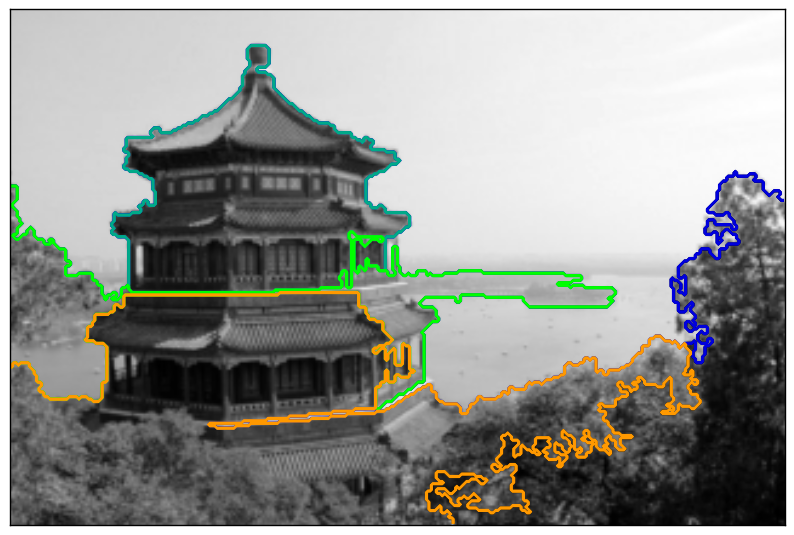

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()